# Initialise 

In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2
import c14
from c14 import livermodels as lm



In [3]:
data = pd.read_csv('./results/C14data_liver_samples_20190502.csv')
c14_patient_data = data.groupby(['type', 'sample', 'ploidy', 'pathology']).mean().dropna(how='all').reset_index()
c14_patient_data['age'] = c14_patient_data.Dcoll - c14_patient_data.Dbirth 
c14_patient_data['e14C'] = c14_patient_data.error_measurement
data = c14_patient_data.query('type == "hepatocyte" and pathology != "Y"')
edata = c14.exp_data(data)

In [4]:
m  = lm.Pl40d4()
op = c14.optimize(model=m,data=edata,step_size=2)
vis= c14.visualisze(model=m,data=edata)


In [5]:
m

ValueError: delta2 is negative

In [6]:
m.limit['lambda2'] = (1e-99, 1e0)
m.limit['delta4'] = (1e-99, 1e0)

In [7]:
m

ValueError: delta2 is negative

# Fit

In [ ]:
res = op.optimize_minuit(dict(lambda2=-0.21, delta4=-1))

In [ ]:
res

In [ ]:
fit_limit = {'lambda2': (-3, 0),
            'delta4': (-10, 0)}

In [ ]:
%%time
res_M = op.optimize_minuit_multistart(n=100,processes=7, fit_limit=fit_limit)

In [ ]:
best_res = res_M.loc[res_M['fval'].idxmin()]

In [ ]:
best_res

In [ ]:
best_res['values']

# Visualise

In [ ]:
m.set_parameters(best_res['values'])

In [ ]:
m.nparas

In [ ]:
op.loglike_dict(best_res['values'])

In [ ]:
op.calc_aicc(best_res['values'])

In [ ]:
vis.plot_parameter()
plt.legend()
plt.show()

In [ ]:
para = vis.get_parameter(dict(lambda2=-0.21,delta4=-1))

In [ ]:
para.to_excel('./results/params.xlsx')

In [23]:
po = best_res['values']
m.set_parameters(po)
_ = vis.odeint()

({'n2': <matplotlib.axes._subplots.AxesSubplot at 0x7fce95559390>,
  'n4': <matplotlib.axes._subplots.AxesSubplot at 0x7fce95582908>},
 <matplotlib.cm.ScalarMappable at 0x7fce95531e80>)

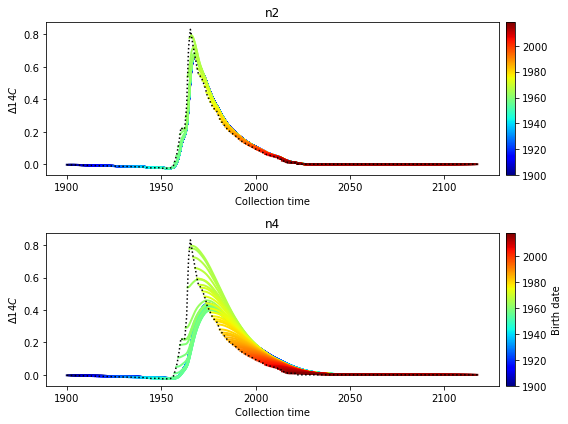

In [24]:
vis.plot_generic()

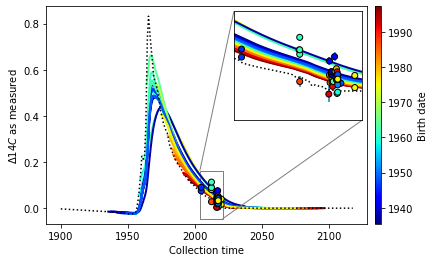

In [25]:
vis.plot_simdata()

In [26]:
#vis.plot_simdata_birth()

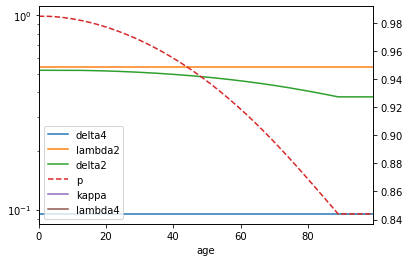

In [27]:
l = vis.plot_parameter(log=True,nonlog=['p'])
plt.legend()

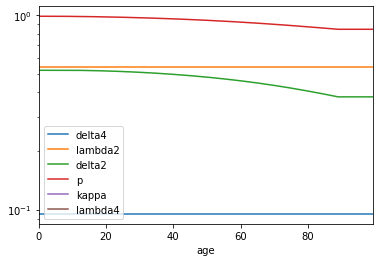

In [28]:
vis.plot_parameter(log=True)
plt.legend()

In [29]:
m


Parameters are:
delta4 = 0.09513662105833592
lambda2 = 0.5385397662343379

Implicit Parameters are:
delta2 = [0.5198111415388234, 0.5121318914750741, 0.47926337691659865, 0.4210425760660271, 0.37962246756148826]
p = [0.9846617876255228, 0.9727545983576465, 0.9385081861663506, 0.882317810317449, 0.8439887571322656]
kappa = [0, 0, 0, 0, 0]
lambda4 = [0, 0, 0, 0, 0]

Variables are t=[0,25,50,75,100]:
n2
n4

Default parameters are:
lambda2 = 1
delta4 = 1

Default limit are:
lambda2 = (1e-99, 1.0)
delta4 = (1e-99, 1.0)

Default errors are:
lambda2 = 0.5
delta4 = 0.5